### Libraries required

In [98]:
#libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Loading the Dataset

In [68]:
telco_df = pd.read_csv("customer_churn.csv")

### Viewing the dataset 

In [69]:
telco_df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [70]:
# Rows and Columns count
telco_df.shape

(7043, 21)

In [71]:
# Information on the dataset
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [133]:
#Numerical summary of the dataset
telco_df.describe()


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


We can tell alot from this 
1. Most of our Customers are not Senior Citizens meaning age is below 60%
2. Since Max tenure is 72 we know that the customer has stayed with telco Organization for maximum of 6 years

### Checking for duplicates in the dataset

In [73]:
telco_df.duplicated().sum()

0

### Checking for missing values/ Null values

In [74]:
telco_df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

### Dealing with the missing values.

In [75]:
# Viewing the rows with the missing values.
telco_df[telco_df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [76]:
# confirming that only rows with tenure = 0 have a null value for Total charges
telco_df[telco_df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


This is because a new cutomer(tenure = 0) won't have any new charges hence the TotalCharges is 0

### Imputing the missing values with 0

In [77]:
telco_df['TotalCharges'] = telco_df['TotalCharges'].fillna(0)

In [78]:
#confirming their no missing values left
telco_df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Understanding the Dataset

In [79]:
# viewing the columns we have.
telco_df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

### Variables Description

In [80]:
# Getting the unique values per column
for col in telco_df.columns:
    print(f"\n--- {col} ---")
    print(telco_df[col].unique())



--- customerID ---
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']

--- gender ---
['Female' 'Male']

--- SeniorCitizen ---
[0 1]

--- Partner ---
['Yes' 'No']

--- Dependents ---
['No' 'Yes']

--- tenure ---
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]

--- PhoneService ---
['No' 'Yes']

--- MultipleLines ---
['No phone service' 'No' 'Yes']

--- InternetService ---
['DSL' 'Fiber optic' 'No']

--- OnlineSecurity ---
['No' 'Yes' 'No internet service']

--- OnlineBackup ---
['Yes' 'No' 'No internet service']

--- DeviceProtection ---
['No' 'Yes' 'No internet service']

--- TechSupport ---
['No' 'Yes' 'No internet service']

--- StreamingTV ---
['No' 'Yes' 'No internet service']

--- StreamingMovies ---
['No' 'Yes' 'No internet service']

--- Contract ---
['Month-to-month' 'O

From the above 
## Variable Description is :
| Column             | Description                                                                 |
| ------------------ | --------------------------------------------------------------------------- |
| `customerID`       | Unique identifier for each customer.                                        |
| `gender`           | Customer’s gender (Male or Female).                                     |
| `SeniorCitizen`    | Indicates if the customer is a senior (1 = Yes, 0 = No).                    |
| `Partner`          | Whether the customer has a spouse or partner.                               |
| `Dependents`       | Whether the customer has dependents (like children or others they support). |
| `tenure`           | Number of months the customer has stayed with the company.                  |
| `PhoneService`     | Whether the customer has a telephone service.                               |
| `MultipleLines`    | Whether the customer has multiple phone lines.                              |
| `InternetService`  | Type of internet service (DSL, Fiber optic, or No).                   |
| `OnlineSecurity`   | Whether the customer has online security (or no internet).                  |
| `OnlineBackup`     | Whether the customer has online backup service.                             |
| `DeviceProtection` | Whether the customer has device protection service.                         |
| `TechSupport`      | Whether the customer has tech support access.                               |
| `StreamingTV`      | Whether the customer streams TV.                                            |
| `StreamingMovies`  | Whether the customer streams movies.                                        |
| `Contract`         | Type of contract (Month-to-month, One year, Two year).                |
| `PaperlessBilling` | Whether billing is paperless.                                               |
| `PaymentMethod`    | Method of payment (e.g., Electronic check, Credit card).                |
| `MonthlyCharges`   | Amount charged to the customer per month.                                   |
| `TotalCharges`     | Total amount charged to the customer to date.                               |
| `Churn`            | Whether the customer has left the company (Yes or No).                  |


### Correlation of Numeric Values

Checking correlation for our numeric values.

In [ ]:
numeric_columns_data = telco_df.select_dtypes(include=['int64','float64']) # selecting only numeric columns
numeric_corr_matrix = numeric_columns_data.corr() # perfoming correlations on the numeric columns

#### Heat map for visualization

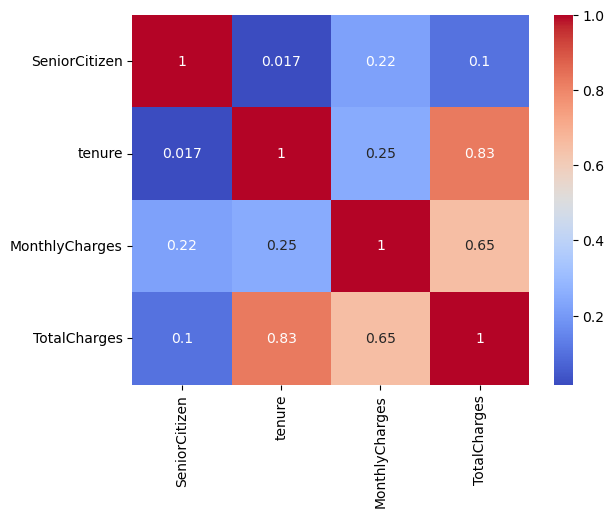

In [ ]:
sns.heatmap(numeric_corr_matrix, annot=True, cmap='coolwarm') # Creating the hea
plt.show()

We can see that the Total Charges, Tenure and Monthly Charges are highly correlated
This could be because the Total Charges is given by:
$$
\begin{align}
\text{Total Charges} &= \text{Tenure} \times \text{Monthly Charges}
\end{align}
$$


## EDA Explaining how the different contribute to the churn rate directly and indirectly.

### Churn Rate

Churn
No     5174
Yes    1869
Name: count, dtype: int64
 


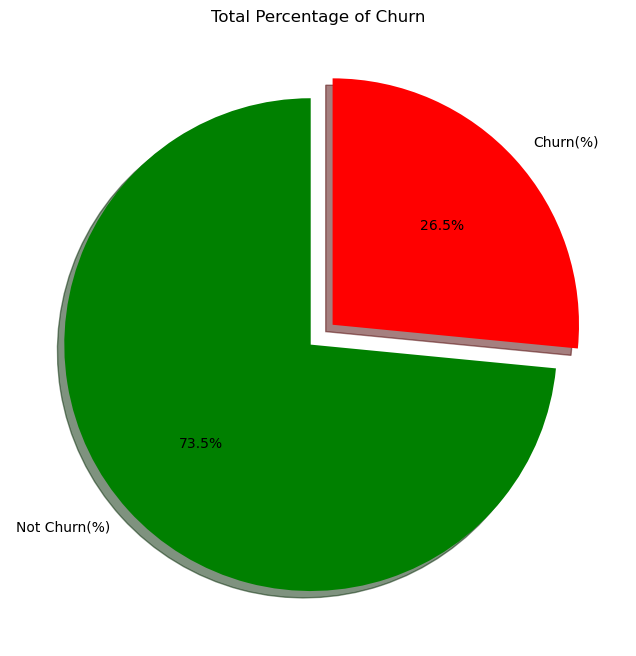

In [ ]:
#Printing out the 
print(telco_df.Churn.value_counts())
print(" ")

# Dependent Variable Column Visualization
telco_df['Churn'].value_counts().plot( kind='pie',figsize=(10,8),
autopct="%1.1f%%",
startangle=90,
shadow=True,
labels=['Not Churn(%)','Churn(%)'],
colors=['green','red'],explode=[0.04,0.08])
plt.ylabel("")
plt.title('Total Percentage of Churn')

# Displaying chart
plt.show()

From the above chart we got to know that, there are 5174 customers which are not churned which is 73.5% of the whole customers data given in the dataset. In other hand, 1869 customers are churned which is 26.5 of the whole customers data given in the dataset.

Ideally the customer churn rate in telecom industry is in between 15 % to 20 % . In this we have 26.5 % churn rate which is very high. Hence fast action is required.

### Correlation of the Churn Rate using groupby and bars.

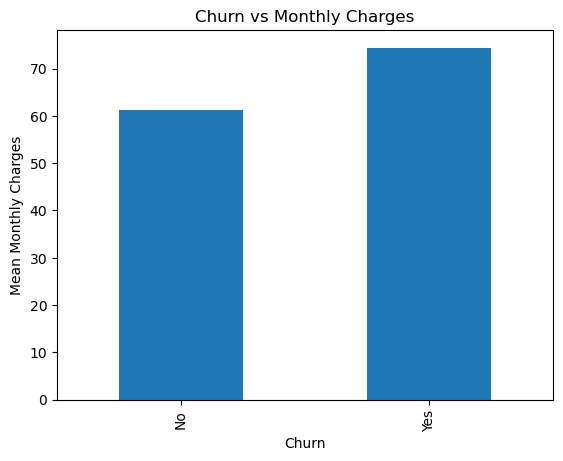

In [168]:
telco_df.groupby("Churn")["MonthlyCharges"].mean().plot(kind= 'bar')
plt.title("Churn vs Monthly Charges")
plt.ylabel("Mean Monthly Charges")
plt.show()

Most of those who churned suffered a higher amount of monthly charges

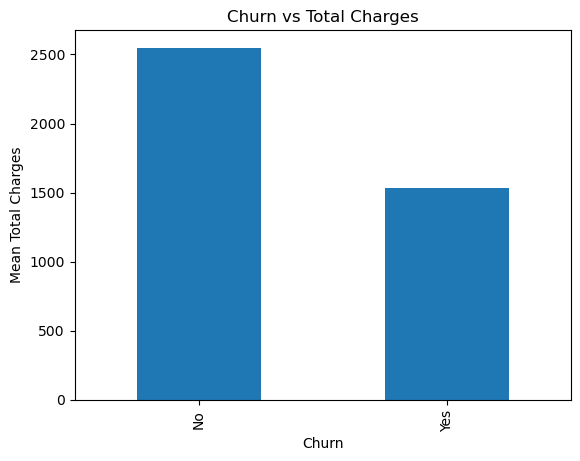

In [167]:
telco_df.groupby("Churn")["TotalCharges"].mean().plot(kind= 'bar')
plt.title("Churn vs Total Charges")
plt.ylabel("Mean Total Charges")
plt.show()

But of them who had high Total charges did not churn.

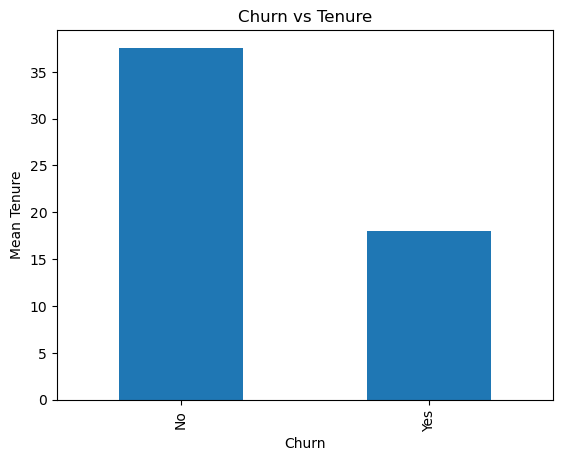

In [170]:
telco_df.groupby("Churn")["tenure"].mean().plot(kind= 'bar')
plt.title("Churn vs Tenure")
plt.ylabel("Mean Tenure")
plt.show()

Customers who have stayed longer with the company have not chuned.

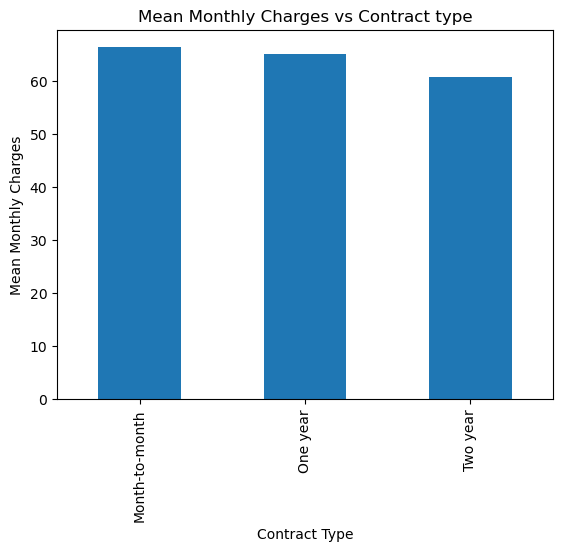

In [177]:
telco_df.groupby("Contract")["MonthlyCharges"].mean().plot(kind="bar")
plt.ylabel("Mean Monthly Charges")
plt.xlabel("Contract Type")
plt.title("Mean Monthly Charges vs Contract type")
plt.show()

At longer terms the monthly charges decrease.

## How the different Services affect the Monthly Charges

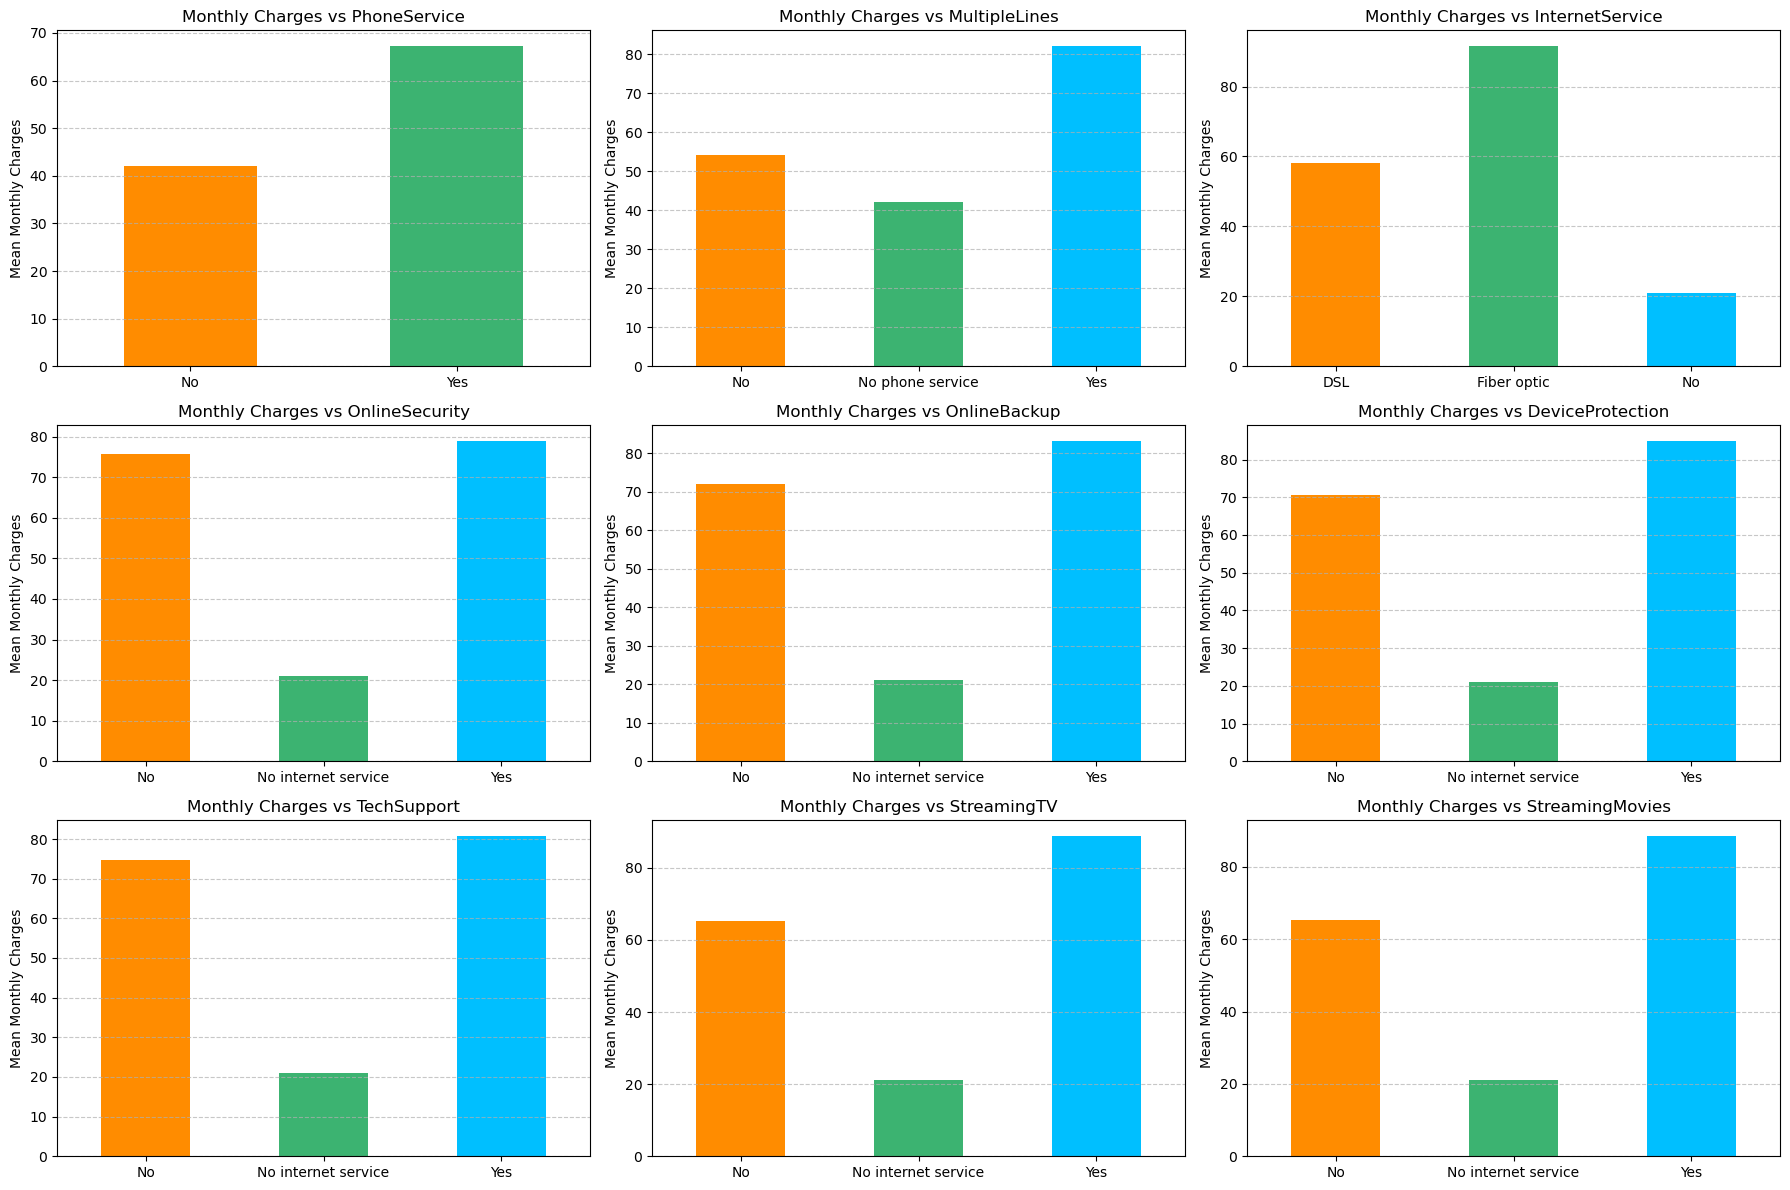

In [192]:
# Sectioning the service columns
service_cols = telco_df.columns[6:15]

# Create subplots: 3 rows x 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each service column and plot a bar plot 
for i, col in enumerate(service_cols):
    telco_df.groupby(col)["MonthlyCharges"].mean().plot(
        kind="bar",
        ax=axes[i],
        color=["darkorange", "mediumseagreen", "deepskyblue"]
    )
    axes[i].set_title(f"Monthly Charges vs {col}")
    axes[i].set_ylabel("Mean Monthly Charges")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)


# Hide any unused subplots (if less than 9)
for j in range(len(service_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


We can see that the mean monthly charges are affected by the Different Services provided. This makes sense as inn most descriptions one is charged for the services they use.

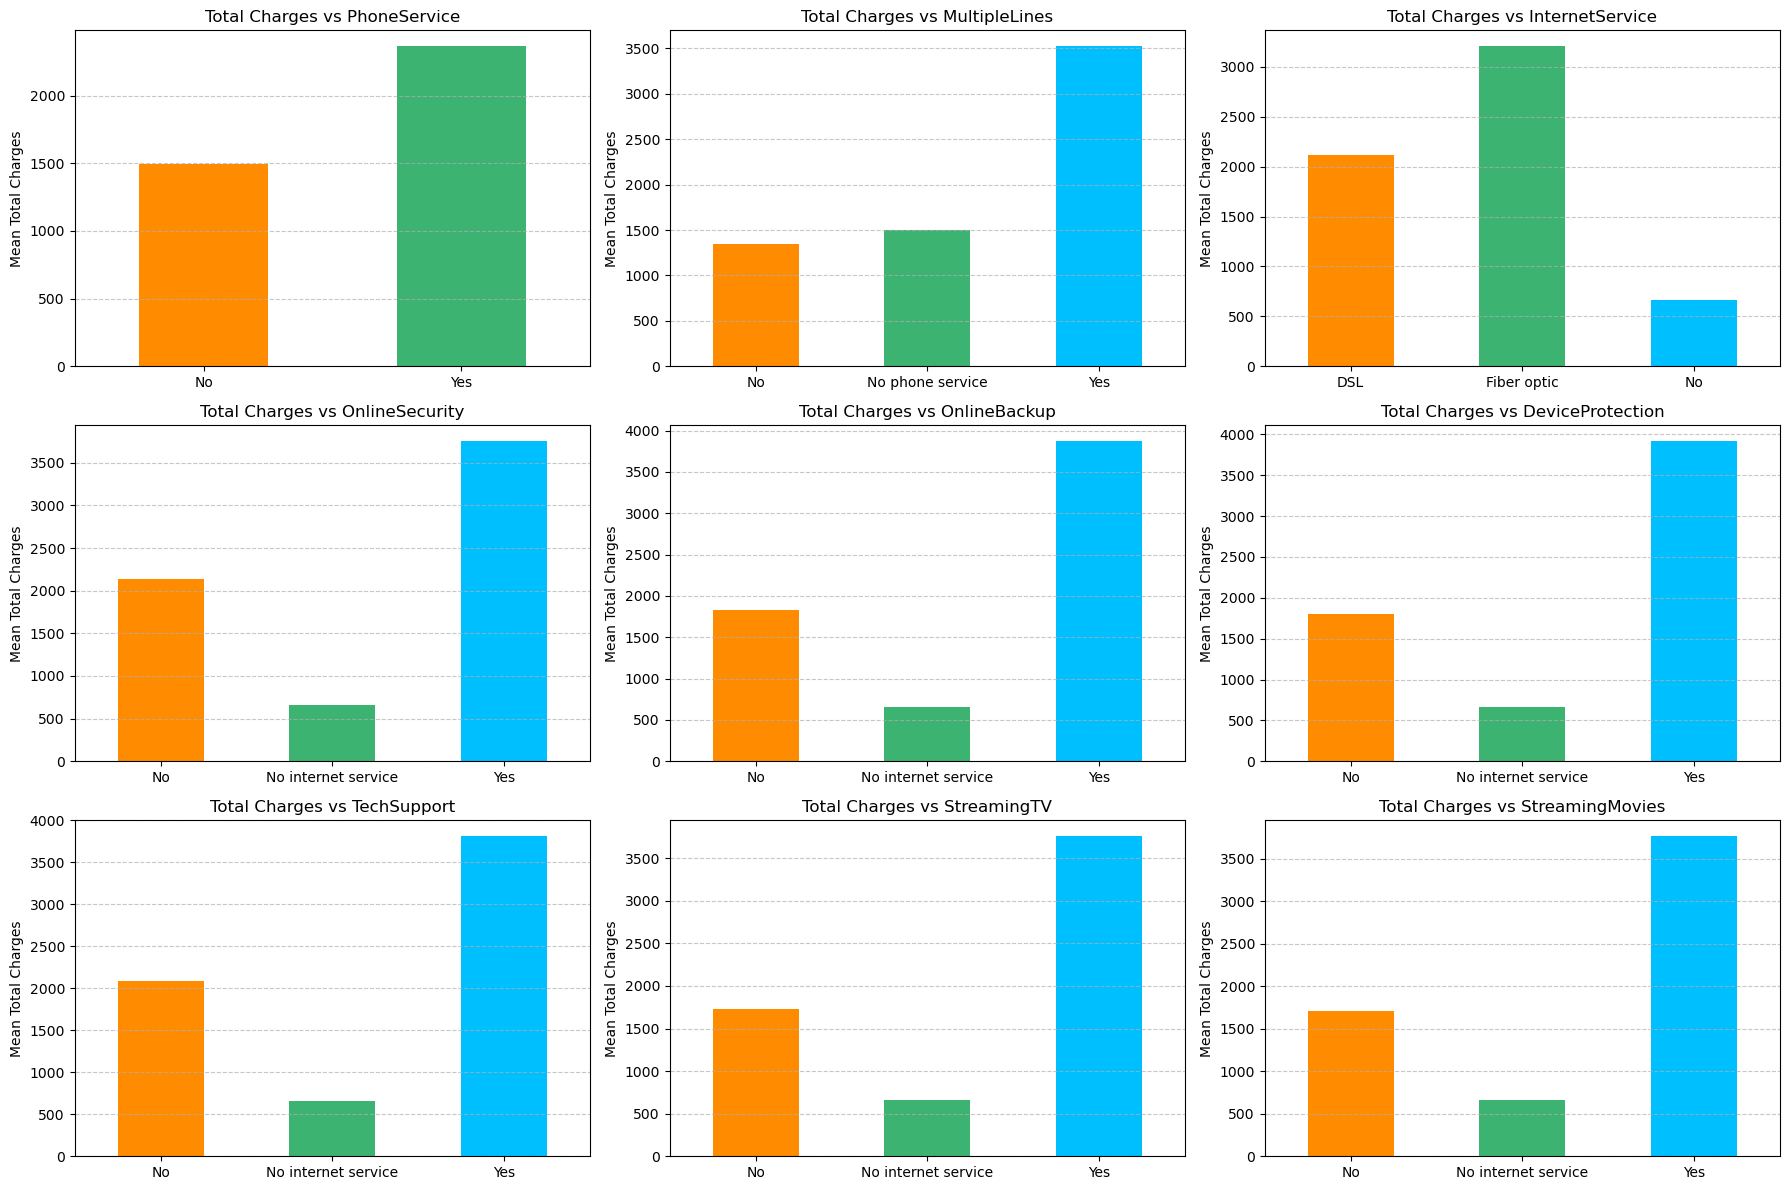

In [ ]:
# Sectioning the service columns
service_cols = telco_df.columns[6:15]

# Create subplots: 3 rows x 3 columns
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
axes = axes.flatten()  # Flatten to easily iterate

# Loop through each service column and plot a bar plot 
for i, col in enumerate(service_cols):
    telco_df.groupby(col)["TotalCharges"].mean().plot(
        kind="bar",
        ax=axes[i],
        color=["darkorange", "mediumseagreen", "deepskyblue"]
    )
    axes[i].set_title(f"Total Charges vs {col}")
    axes[i].set_ylabel("Mean Total Charges")
    axes[i].set_xlabel("")
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)


# Hide any unused subplots (if less than 9)
for j in range(len(service_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


The same thing we observed in the Monthly Charges the Services one subscribes to affects their Total Charges.

## Correlation of the dataset with Churn rate.

In [193]:
# Convert 'Churn' to binary for correlation (Yes = 1, No = 0)
telco_df["Churn"] = telco_df["Churn"].map({"Yes": 1, "No": 0})

In [ ]:
# Defining the categorical columns
categorical_cols = telco_df.select_dtypes(include='object').columns